In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [94]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url) #0 indexed

In [95]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [96]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


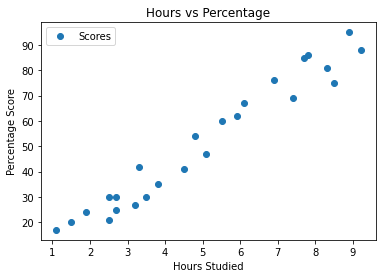

In [97]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

as we can see there seems to be a linear relationship in the graph between Percentage score of studnts and Hours Studied

now lets make 2 sets for test and train, we want to see if out model works good enough before predicting values

In [98]:
msk = np.random.rand(len(data)) < 0.8 #random values are taken for test and train
train=data[msk]
test=data[~msk]
x_train = np.asanyarray(train[['Hours']])
y_train = np.asanyarray(train[['Scores']])
x_test = np.asanyarray(test[['Hours']])
y_test = np.asanyarray(test[['Scores']])

In [99]:
test

,Hours,Scores
4,3.5,30
8,8.3,81
16,2.5,30
17,1.9,24
19,7.4,69


In [100]:
train

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
5,1.5,20
6,9.2,88
7,5.5,60
9,2.7,25
10,7.7,85
11,5.9,62


in the graph below we can see what values are taken for test and what are taken for train

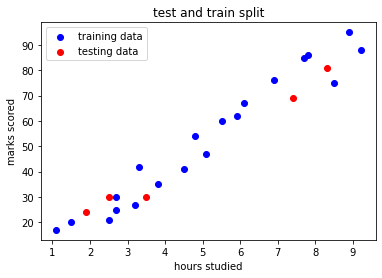

In [101]:
plt.scatter(train.Hours, train.Scores,  color='blue', label='training data')
plt.scatter(test.Hours, test.Scores,  color='red', label='testing data')
plt.xlabel('hours studied')
plt.ylabel('marks scored')
plt.title('test and train split')
plt.legend()

In [102]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [103]:
regr.fit(x_train,y_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
m=regr.coef_;
c=regr.intercept_;

Coefficients:  [[10.01811633]]
Intercept:  [1.70787849]


we have imported the linear regression model from sklearn and have fitted it to our graph, we have now obtained the parameters for linear fit(namely x coefficiant and x intercept of regression line)

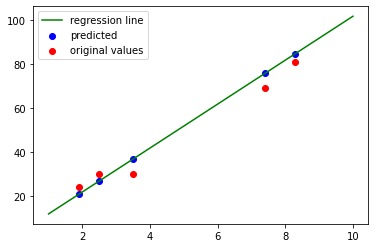

In [112]:
y_predicted = regr.predict(x_test)
plt.scatter(x_test,y_predicted, color='blue', label='predicted')
plt.scatter(x_test,y_test,color='red',label='original values')
xx=np.array([1,3,5,7,10])
yy=(m*xx)+ c
plt.plot(xx,yy[0],color='green',label='regression line')
plt.legend()

as we can see the original data and predicted data are very close and we can proceed to use this model for predicting values

In [114]:
x_data=data[['Hours']]
y_data=data[['Scores']]

In [117]:
regr.fit(x_data,y_data)

LinearRegression()

In [118]:
regr.predict([[9.25]])

array([[92.90985477]])

so according to our model if student 9.25 hours per day he will get nearly 92 marks in the exam

In [119]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


92 is almost the highest score in class which is way above in 4th quartile which is an amazing score!! 